<a href="https://colab.research.google.com/github/Kanusharma2002/Business-Analysis/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib seaborn statsmodels pmdarima prophet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [4]:
try:
    df = pd.read_csv('avocado.csv')
except FileNotFoundError:
    print("Error: 'avocado.csv' not found. Please upload the file or adjust the path.")
    # Example for Google Drive:
    # df = pd.read_csv('/content/drive/MyDrive/Your_Folder/avocado.csv')
    exit() # Exit if the file isn't found

In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany

In [6]:
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [7]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [8]:
print("\nUnique Regions:", df['region'].nunique())
print(df['region'].unique())
print("\nUnique Types:", df['type'].unique())


Unique Regions: 54
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']

Unique Types: ['conventional' 'organic']


In [9]:
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df_filtered = df[(df['type'] == 'conventional') & (df['region'] == 'TotalUS')].copy()


In [11]:
df_filtered = df_filtered[['Date', 'AveragePrice', 'Total Volume']].sort_values('Date')


In [12]:
df_filtered.set_index('Date', inplace=True)


In [13]:
price_ts = df_filtered['AveragePrice']


In [14]:
price_ts = price_ts.resample('W').mean() # Resample to weekly mean price if data is daily but has duplicates or irregular frequency


In [16]:
price_ts = price_ts.fillna(method='ffill').fillna(method='bfill') # Forward fill then backward fill

print("\nFirst few entries of the filtered avocado price time series:")
print(price_ts.head())
print("\nLast few entries of the filtered avocado price time series:")
print(price_ts.tail())



First few entries of the filtered avocado price time series:
Date
2015-01-04    0.95
2015-01-11    1.01
2015-01-18    1.03
2015-01-25    1.04
2015-02-01    0.89
Freq: W-SUN, Name: AveragePrice, dtype: float64

Last few entries of the filtered avocado price time series:
Date
2018-02-25    1.06
2018-03-04    1.07
2018-03-11    1.09
2018-03-18    1.05
2018-03-25    1.03
Freq: W-SUN, Name: AveragePrice, dtype: float64


/tmp/ipython-input-16-2490131882.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_ts = price_ts.fillna(method='ffill').fillna(method='bfill') # Forward fill then backward fill


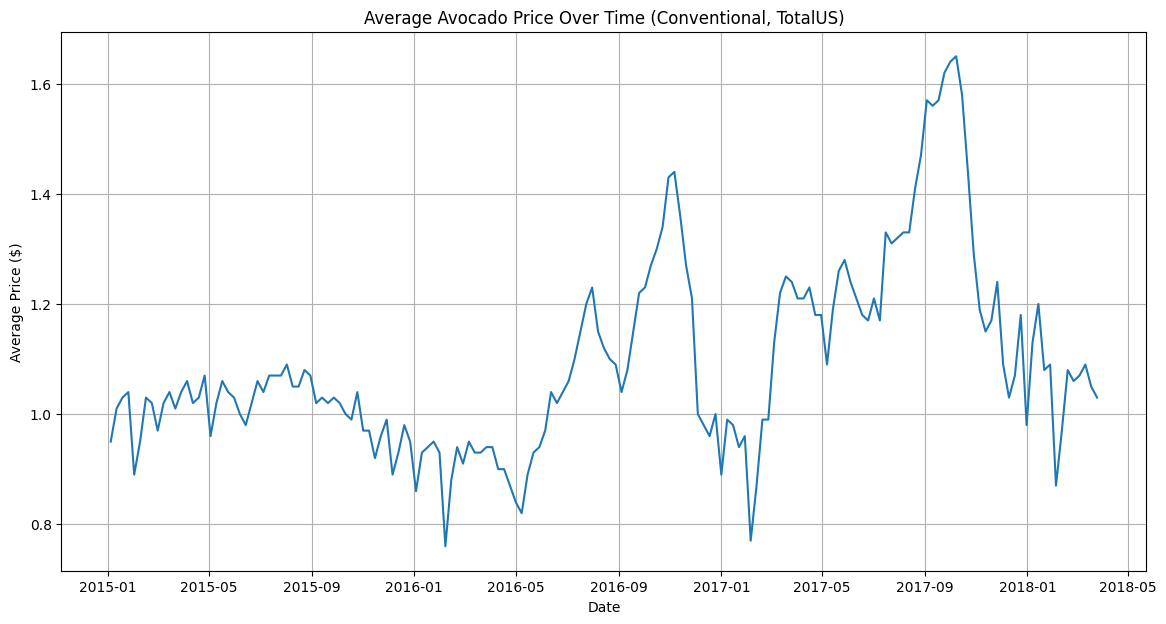

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(price_ts)
plt.title('Average Avocado Price Over Time (Conventional, TotalUS)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

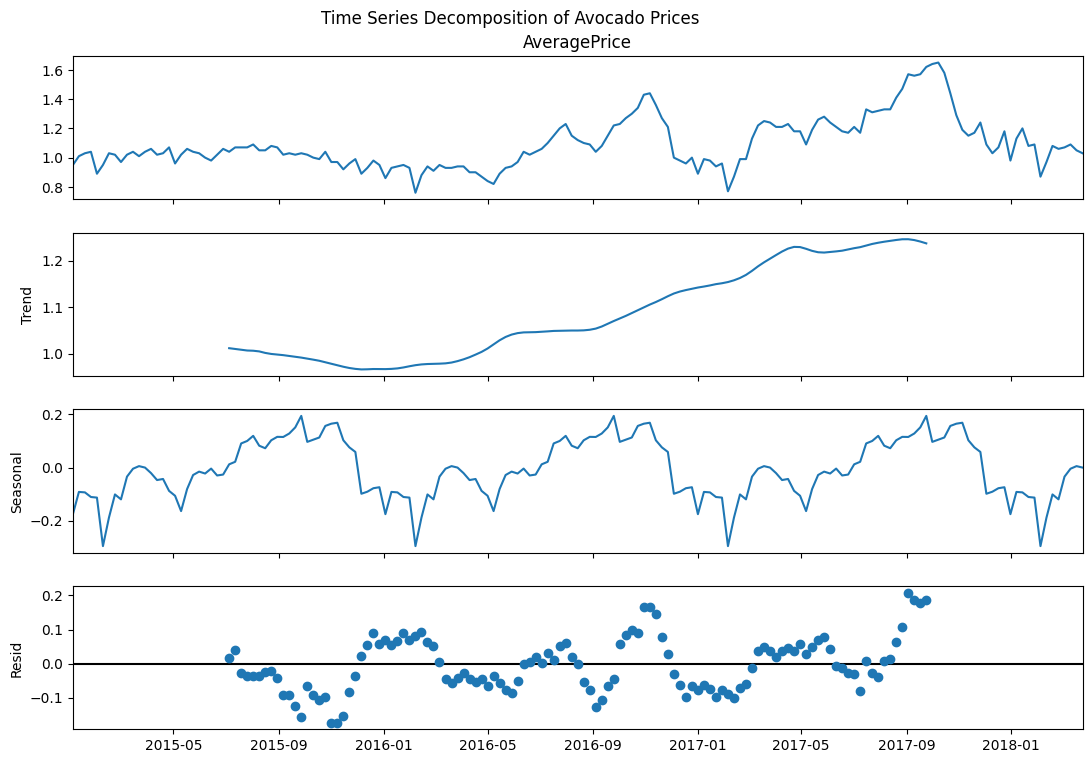

In [18]:
decomposition = seasonal_decompose(price_ts, model='additive', period=52) # Assuming yearly seasonality (52 weeks)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Avocado Prices')
plt.show()

In [19]:
print("\nAugmented Dickey-Fuller Test for Stationarity:")
adf_test = adfuller(price_ts)
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations'])
for key, value in adf_test[4].items():
    adf_output['Critical Value (%s)' % key] = value
print(adf_output)


Augmented Dickey-Fuller Test for Stationarity:
Test Statistic             -2.573341
p-value                     0.098633
#Lags Used                  0.000000
Number of Observations    168.000000
Critical Value (1%)        -3.469886
Critical Value (5%)        -2.878903
Critical Value (10%)       -2.576027
dtype: float64


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 104 must be < 84.

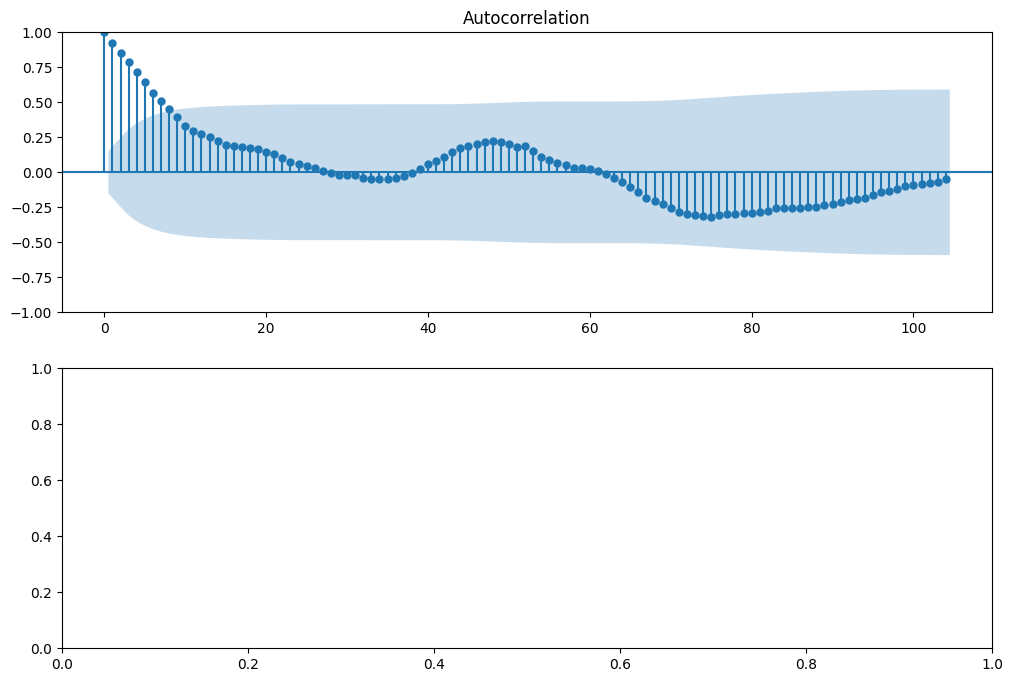

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(price_ts, ax=ax1, lags=52*2) # Show autocorrelation for up to 2 years (approx 104 weeks)
plot_pacf(price_ts, ax=ax2, lags=52*2)
plt.suptitle('Autocorrelation and Partial Autocorrelation Functions of Avocado Prices')
plt.show()

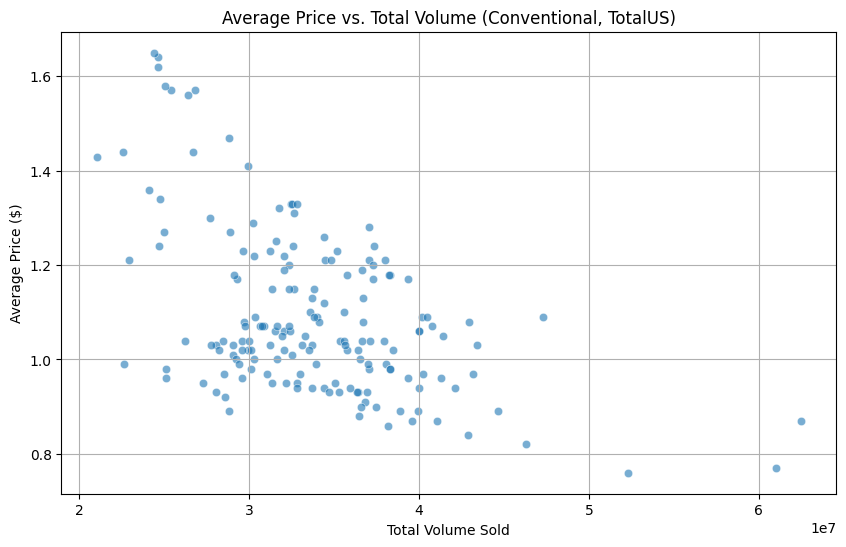

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['Total Volume'], y=df_filtered['AveragePrice'], alpha=0.6)
plt.title('Average Price vs. Total Volume (Conventional, TotalUS)')
plt.xlabel('Total Volume Sold')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

In [22]:
print("\nCorrelation between AveragePrice and Total Volume:")
print(df_filtered[['AveragePrice', 'Total Volume']].corr())


Correlation between AveragePrice and Total Volume:
              AveragePrice  Total Volume
AveragePrice       1.00000      -0.50996
Total Volume      -0.50996       1.00000


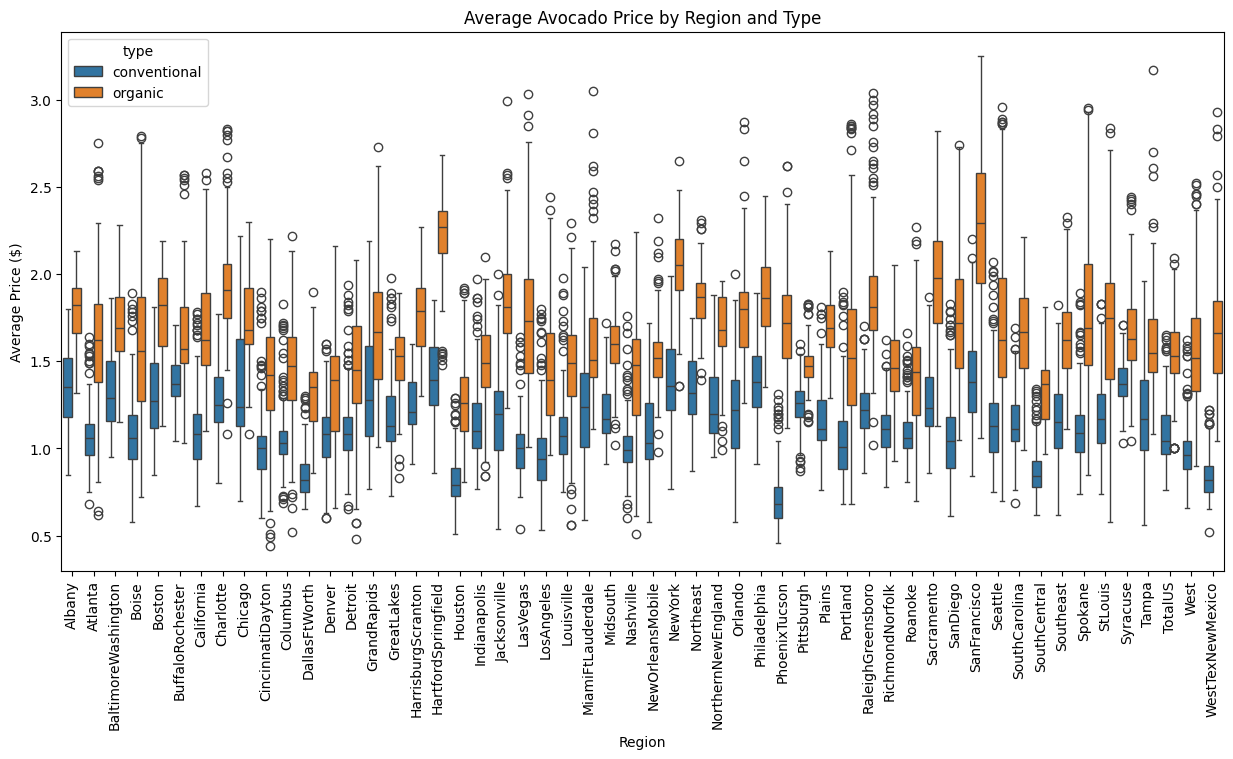

In [23]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='region', y='AveragePrice', hue='type', data=df)
plt.xticks(rotation=90)
plt.title('Average Avocado Price by Region and Type')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.show()

In [24]:
test_size = 52

In [25]:
train_data, test_data = price_ts[:-test_size], price_ts[-test_size:]

print(f"\nTraining data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")


Training data points: 117
Testing data points: 52


In [26]:
order = (1, 1, 1)

In [27]:
seasonal_order = (1, 1, 0, 52)

In [28]:
print("\nFitting SARIMA model...")



Fitting SARIMA model...


In [29]:
import warnings
warnings.filterwarnings("ignore") # Suppress convergence warnings

try:
    model = SARIMAX(train_data,
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    print(model_fit.summary())
except Exception as e:
    print(f"Error fitting SARIMA model: {e}")
    print("Consider adjusting SARIMA (p,d,q)(P,D,Q)s parameters or using auto_arima.")
    exit()

                                      SARIMAX Results                                      
Dep. Variable:                        AveragePrice   No. Observations:                  117
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 52)   Log Likelihood                  18.675
Date:                             Sat, 21 Jun 2025   AIC                            -29.350
Time:                                     16:54:43   BIC                            -27.758
Sample:                                 01-04-2015   HQIC                           -30.353
                                      - 03-26-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1682      0.948     -0.177      0.859      -2.026       1.690
ma.L1          1.0004    41

In [30]:
start_index = len(train_data)
end_index = len(price_ts) - 1
predictions = model_fit.predict(start=start_index, end=end_index, dynamic=False)

In [31]:
predictions.index = test_data.index

print("\nFirst 5 predictions:")
print(predictions.head())
print("\nActual test data head:")
print(test_data.head())


First 5 predictions:
Date
2017-04-02    1.215805
2017-04-09    1.179701
2017-04-16    1.178529
2017-04-23    1.145025
2017-04-30    1.119137
Freq: W-SUN, Name: predicted_mean, dtype: float64

Actual test data head:
Date
2017-04-02    1.21
2017-04-09    1.21
2017-04-16    1.23
2017-04-23    1.18
2017-04-30    1.18
Freq: W-SUN, Name: AveragePrice, dtype: float64


In [32]:
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mae = mean_absolute_error(test_data, predictions)

print(f"\nModel Evaluation on Test Data:")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")


Model Evaluation on Test Data:
Root Mean Squared Error (RMSE): 0.227
Mean Absolute Error (MAE): 0.177


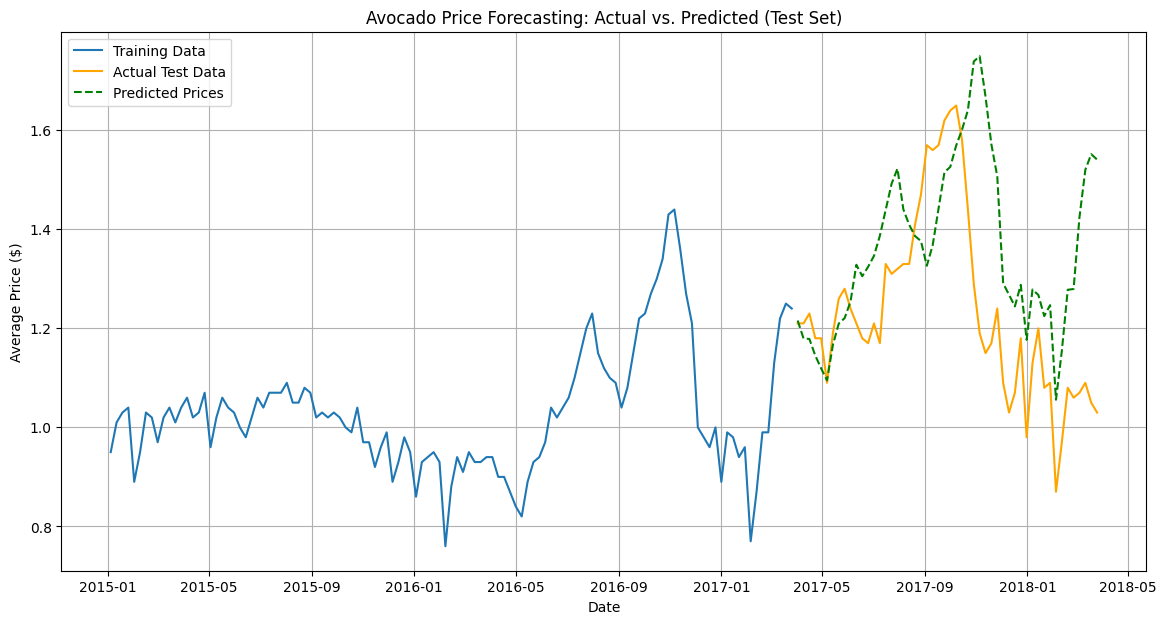

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='orange')
plt.plot(predictions.index, predictions, label='Predicted Prices', color='green', linestyle='--')
plt.title('Avocado Price Forecasting: Actual vs. Predicted (Test Set)')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
forecast_steps = 52 # Forecast for the next year
future_forecast = model_fit.predict(start=len(price_ts), end=len(price_ts) + forecast_steps - 1)



In [35]:
last_date = price_ts.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq=price_ts.index.freq)[1:] # [1:] to exclude last_date itself
future_forecast.index = future_dates

print(f"\nFuture {forecast_steps} Avocado Price Predictions:")
print(future_forecast)



Future 52 Avocado Price Predictions:
2018-04-01    1.515381
2018-04-08    1.479478
2018-04-15    1.478246
2018-04-22    1.444561
2018-04-29    1.418885
2018-05-06    1.394545
2018-05-13    1.466173
2018-05-20    1.509431
2018-05-27    1.520517
2018-06-03    1.553775
2018-06-10    1.628662
2018-06-17    1.605404
2018-06-24    1.624318
2018-07-01    1.646490
2018-07-08    1.687033
2018-07-15    1.739748
2018-07-22    1.792462
2018-07-29    1.823005
2018-08-05    1.740834
2018-08-12    1.709205
2018-08-19    1.686490
2018-08-26    1.676490
2018-09-02    1.626490
2018-09-09    1.668119
2018-09-16    1.742462
2018-09-23    1.815720
2018-09-30    1.826806
2018-10-07    1.870064
2018-10-14    1.902236
2018-10-21    1.941693
2018-10-28    2.040381
2018-11-04    2.050924
2018-11-11    1.969295
2018-11-18    1.872236
2018-11-25    1.807349
2018-12-02    1.591377
2018-12-09    1.568119
2018-12-16    1.544318
2018-12-23    1.588119
2018-12-30    1.477033
2019-01-06    1.578662
2019-01-13    1.567

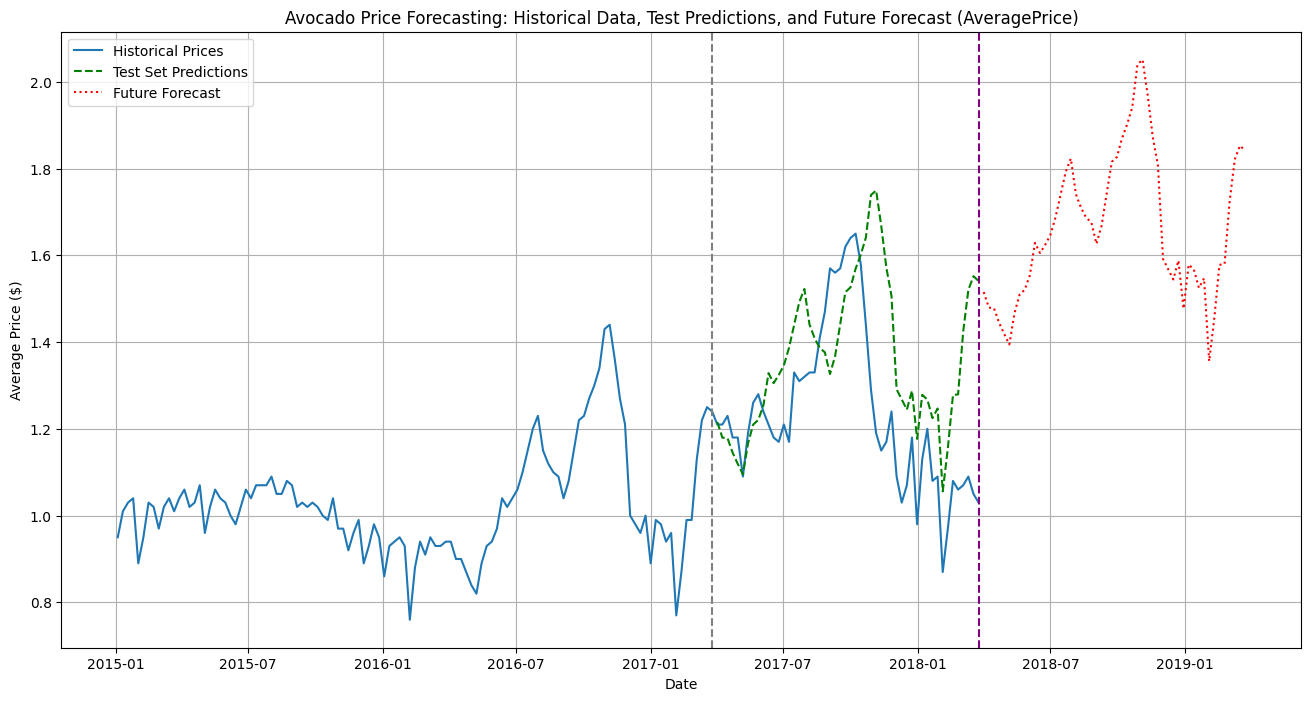

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(price_ts.index, price_ts, label='Historical Prices')
plt.plot(predictions.index, predictions, label='Test Set Predictions', linestyle='--', color='green')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', color='red', linestyle=':')
plt.title(f'Avocado Price Forecasting: Historical Data, Test Predictions, and Future Forecast ({price_ts.name})')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.axvline(x=train_data.index[-1], color='gray', linestyle='--', label='End of Training Data')
plt.axvline(x=test_data.index[-1], color='purple', linestyle='--', label='End of Test Data')
plt.show()

In [37]:
future_forecast.to_csv('future_avocado_prices.csv', header=['Predicted_AveragePrice'])
print("\nFuture avocado price predictions saved to 'future_avocado_prices.csv'")


Future avocado price predictions saved to 'future_avocado_prices.csv'
